## Stock price prediction

### Project Description: Stock Price Prediction Using LSTM 

#### Objective
The goal of this project is to develop a model for predicting stock prices using Long Short-Term Memory (LSTM) neural networks. The project will enable users to input a ticker symbol and predict the stock's future prices, while also providing visualizations for better understanding and analysis through a Streamlit web application.

#### Data Collection
- **Source**: Yahoo Finance
- **Dynamic Input**: Users can input any ticker symbol to fetch the stock data.
- **Data Range**: Historical data will be collected, typically covering several years to ensure enough data points for accurate prediction.

#### Data Preparation
1. **Remove Unwanted Columns**: After fetching the data, columns that are not necessary for prediction (like trading volume, adjusted close, etc.) will be removed.
2. **Calculate Moving Averages**:
   - **100-Day Moving Average (100MA)**: Calculated to smooth out the long-term trends.
   - **50-Day Moving Average (50MA)**: Calculated to identify shorter-term trends.
3. **Data Splitting**: The dataset will be split into training and testing sets in a 70:30 ratio to validate the model's performance.

#### Model Building
- **Architecture**: Long Short-Term Memory (LSTM) neural network, which is well-suited for time series prediction due to its ability to capture long-term dependencies.
- **Training**: The LSTM model will be trained on the historical stock price data to learn patterns and make future predictions.

#### Prediction
- **Output**: The model will predict the future closing prices of the stock based on the historical data provided.

#### Visualization
The project will include the following visualizations to aid in understanding and analyzing the predictions:
1. **Closing Price vs. Time Chart with 100MA**: This graph will plot the historical closing prices along with the 100-day moving average.
2. **Closing Price vs. Time Chart with 100MA & 50MA**: This graph will plot the historical closing prices along with both the 100-day and 50-day moving averages.
3. **Prediction vs. Original**: This graph will compare the predicted stock prices with the actual historical prices to visualize the accuracy of the model.

#### Streamlit Web Application
- **User Interface**: A user-friendly web application will be developed using Streamlit to allow users to input ticker symbols, view predictions, and visualize data.
- **Interactive Features**: Users can interact with the application to dynamically update inputs and view real-time visualizations.

#### Tools and Technologies
- **Data Source**: Yahoo Finance API
- **Programming Language**: Python
- **Libraries**: Pandas, NumPy, TensorFlow/Keras, Matplotlib, Seaborn, Streamlit
- **Environment**: Jupyter Notebook for development; Streamlit for deployment

#### Expected Outcomes
- A functional model capable of predicting stock prices based on historical data.
- An interactive Streamlit web application for inputting ticker symbols and viewing predictions.
- Clear and informative visualizations to understand stock trends and model accuracy.

#### Future Work
- Incorporate additional features like sentiment analysis from news articles or social media.
- Enhance the model by using more complex architectures or ensemble methods.
- Improve the Streamlit application by adding more interactive features and deploying it on a cloud platform for wider accessibility.

This project aims to provide a comprehensive solution for stock price prediction using LSTM, focusing on ease of use and insightful visualizations through an interactive Streamlit application. on ease of use and insightful visualizations.

In [89]:
#importing libraries
import yfinance as yf

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df = yf.Ticker("IDFCFIRSTB.NS")

df = df.history(period="max")

df.drop(columns=['Dividends','Stock Splits'],inplace = True)

df.index = df.index.strftime('%Y-%m-%d')

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-06,67.901282,70.694386,64.530297,67.804970,22781516
2015-11-09,65.252654,65.493438,64.433987,64.482140,10010231
2015-11-10,64.048730,64.048730,61.737195,62.170612,10736961
2015-11-13,63.422688,63.422688,60.677744,61.159313,6771668
2015-11-16,61.111151,63.085585,59.714599,62.604015,5640610


In [95]:
#date is not useful 
df.reset_index(inplace = True)

In [96]:
df.drop(columns='Date',inplace=True)

In [97]:
df.head()

,Open,High,Low,Close,Volume
0,67.901282,70.694386,64.530297,67.804970,22781516
1,65.252654,65.493438,64.433987,64.482140,10010231
2,64.048730,64.048730,61.737195,62.170612,10736961
3,63.422684,63.422684,60.677740,61.159309,6771668
4,61.111155,63.085589,59.714603,62.604019,5640610


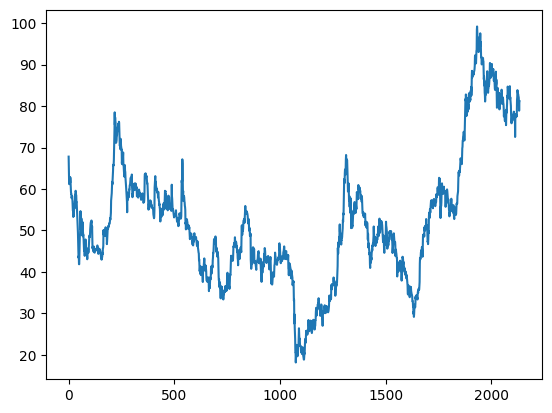

In [98]:
## Initial visualization of IDFC
plt.plot(df.Close)

In [99]:
## creating 100 days moving average

ma100 = df.Close.rolling(100).mean()

ma50 = df.Close.rolling(50).mean()
ma50

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
2130    79.5552
2131    79.5240
2132    79.4498
2133    79.4304
2134    79.3898
Name: Close, Length: 2135, dtype: float64

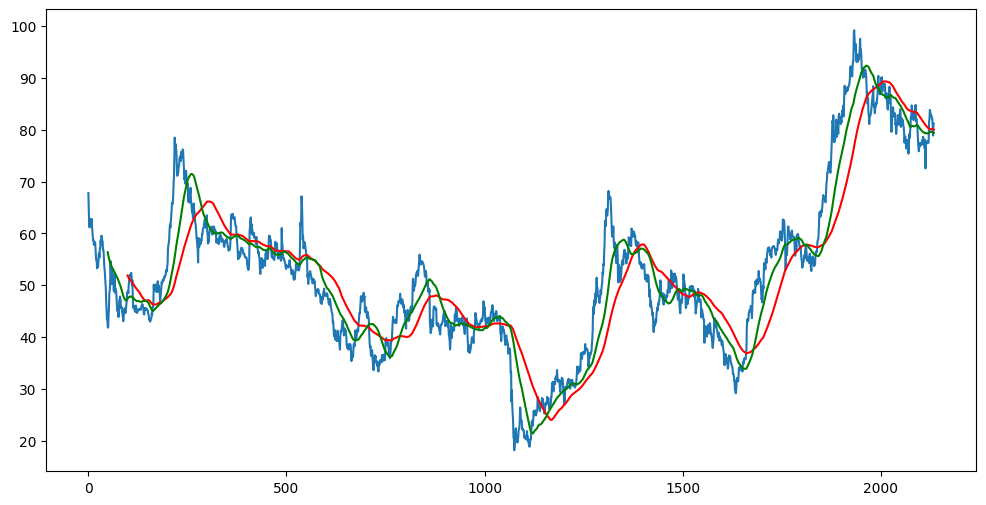

In [100]:
## plotting Closing price v/s 100 days v/s 50 days moving average
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma50,'g')

In [101]:
#Finding no_of_rows and columns
df.shape

(2135, 5)

In [102]:
# Splitting data into training and testing
#taking 70:30 ratio to split data
X = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
y = pd.DataFrame(df['Close'][int(len(df)*0.70):])

In [103]:
X.shape

(1494, 1)

In [104]:
y.shape

(641, 1)

In [105]:
X.head()

,Close
0,67.804970
1,64.482140
2,62.170612
3,61.159309
4,62.604019


In [106]:
y.head()

,Close
1494,44.599998
1495,46.299999
1496,46.950001
1497,47.250000
1498,46.599998


In [107]:
## Scaling data by using MinMaxScaler

from sklearn.preprocessing import * 
M = MinMaxScaler(feature_range=(0,1))

In [108]:
X_array = M.fit_transform(X)

In [109]:
xtrain=[]
ytrain=[]

# we take n days of values and predict the next day value
#here we are taking 100 days values and predicting next day value
for i in range(100,X_array.shape[0]):
    xtrain.append(X_array[i-100:i])
    ytrain.append(X_array[i,0])

In [110]:
xtrain,ytrain = np.array(xtrain),np.array(ytrain)

In [114]:
xtrain.shape

(1394, 100, 1)

In [111]:
## Building ML Model

In [112]:
from keras.layers import * 

In [113]:
from keras.models import * 

In [115]:
model = Sequential() #building LSTM by adding 4 layes

model.add(LSTM(units=50,activation = 'relu',return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #adding dense layer in order to connect those 4 layers

In [116]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 27s 256ms/step - loss: 0.1235
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - loss: 0.0156
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - loss: 0.0118
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - loss: 0.0105
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - loss: 0.0092
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - loss: 0.0081
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - loss: 0.0091
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - loss: 0.0077
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - loss: 0.0073
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - loss: 0.0070
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - loss: 0.0070
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - loss: 0.0076
Epoch 13/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - loss: 0.0063
Epoch 14/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - loss: 0.0072
Epoch 15/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [120]:
#saving our model
model.save('my_model.keras')

In [121]:
y.head()

,Close
1494,44.599998
1495,46.299999
1496,46.950001
1497,47.250000
1498,46.599998


In [122]:
#predict values for testing data, by taking data from training set 
past_100_days = X.tail(100)

In [125]:
final_df = pd.concat([past_100_days,y],ignore_index=True)

In [126]:
final_df.head()

,Close
0,54.450001
1,53.599998
2,53.950001
3,53.200001
4,53.750000


In [127]:
#scale final_df 
input_data = M.fit_transform(final_df)
input_data

array([[0.36117062],
       [0.3490364 ],
       [0.35403286],
       [0.34332622],
       [0.35117775],
       [0.35474663],
       [0.35474663],
       [0.35189151],
       [0.34618134],
       [0.35546039],
       [0.33476088],
       [0.31477519],
       [0.32833694],
       [0.31406142],
       [0.31477519],
       [0.30835119],
       [0.30763743],
       [0.32548183],
       [0.32619559],
       [0.32405424],
       [0.32191295],
       [0.29407568],
       [0.26623841],
       [0.28622415],
       [0.26052823],
       [0.23840113],
       [0.25339047],
       [0.23911495],
       [0.23340473],
       [0.22412562],
       [0.2141328 ],
       [0.22127056],
       [0.1805853 ],
       [0.16845113],
       [0.1962884 ],
       [0.19129194],
       [0.18629553],
       [0.19057817],
       [0.20413992],
       [0.19700217],
       [0.21841544],
       [0.22483944],
       [0.23554607],
       [0.22840832],
       [0.24625271],
       [0.24268383],
       [0.25339047],
       [0.252

In [128]:
input_data.shape

(741, 1)

In [129]:
xtest=[]
ytest=[]

for i in range(100,input_data.shape[0]):
    xtest.append(input_data[i-100:i])
    ytest.append(input_data[i,0])
    

In [130]:
xtest,ytest = np.array(xtest),np.array(ytest)

In [131]:
print(xtest.shape)
print(ytest.shape)

(641, 100, 1)
(641,)


In [132]:
# Making predictions

ypred = model.predict(xtest)
ypred.shape

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step


(641, 1)

In [133]:
ytest

array([0.22055674, 0.24482513, 0.25410424, 0.25838688, 0.24910777,
       0.26623841, 0.27765881, 0.2905068 , 0.32762312, 0.3133476 ,
       0.30906496, 0.30049967, 0.29336191, 0.26980729, 0.23483226,
       0.2369736 , 0.26980729, 0.26481088, 0.25339047, 0.24625271,
       0.26052823, 0.26052823, 0.26195576, 0.27408993, 0.29264815,
       0.28765168, 0.29478944, 0.29478944, 0.28622415, 0.29478944,
       0.28765168, 0.2905068 , 0.29478944, 0.28622415, 0.28336904,
       0.26552464, 0.28265527, 0.26552464, 0.25053536, 0.21984297,
       0.22912208, 0.23982872, 0.24910777, 0.25124912, 0.261242  ,
       0.28765168, 0.27480375, 0.26766599, 0.25624553, 0.25124912,
       0.25624553, 0.25838688, 0.24696648, 0.20913633, 0.2319772 ,
       0.23126338, 0.22198432, 0.21770168, 0.21056392, 0.20199857,
       0.20199857, 0.13918633, 0.18415418, 0.18486794, 0.18272665,
       0.17773018, 0.16559601, 0.15631691, 0.16345467, 0.18415418,
       0.18772306, 0.18915064, 0.18201288, 0.16488225, 0.18344

In [134]:
ypred

array([[0.24327898],
       [0.237778  ],
       [0.23265195],
       [0.22925432],
       [0.22792897],
       [0.22843856],
       [0.23060524],
       [0.23394841],
       [0.2383165 ],
       [0.24393916],
       [0.25086364],
       [0.25870508],
       [0.2665717 ],
       [0.27336615],
       [0.27760413],
       [0.27785146],
       [0.27298442],
       [0.2640879 ],
       [0.2539923 ],
       [0.24499425],
       [0.23831952],
       [0.23468783],
       [0.23375274],
       [0.23470165],
       [0.23710296],
       [0.24065584],
       [0.24513505],
       [0.2502939 ],
       [0.25586087],
       [0.26126206],
       [0.26604939],
       [0.2696974 ],
       [0.27208555],
       [0.27330315],
       [0.27348617],
       [0.27277133],
       [0.27070513],
       [0.26760775],
       [0.26376608],
       [0.25911468],
       [0.25298274],
       [0.24540532],
       [0.23757955],
       [0.23127061],
       [0.22770885],
       [0.22681585],
       [0.2289058 ],
       [0.232

In [136]:
#converting all those scaled value to original value
M.scale_

array([0.01427552])

In [137]:
scalefactor = 1/0.01427552

ypred = ypred*scalefactor

ytest = ytest*scalefactor

In [138]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

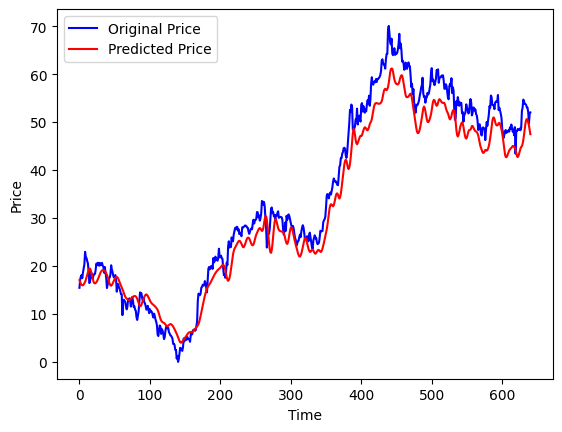

In [139]:
plt.plot(ytest,'b',label = 'Original Price')
plt.plot(ypred,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()